**In order to get the fastest predictions you need to enable GPUs for the notebook:**
* Navigate to Edit→Notebook Settings
* select GPU from the Hardware Accelerator drop-down
(https://colab.research.google.com/notebooks/gpu.ipynb#scrollTo=oM_8ELnJq_wd)

In [1]:
!pip install gpytorch
!pip install ConfigSpace
!pip install openml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.8/245.8 kB 5.1 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.9/145.9 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 14.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 17.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.9/119.9 kB 3.0 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 11.1 MB/s eta 0:00:0000:0100:01
  Created wheel for openml: filename=openml-0.12.2-py3-none-any.whl size=137310 sha256=b536dbd15de694ab9ace179ba2a43e96da5d052ce8041debbc3dda791e02c8ff
  Stored in directory: /home/tidianes/.cache/pip/wheels/e7/d5/5c/c4b7fea64ae57c9d1bc743387033c2bf903e0e97c724cff775
  Created wheel for liac-arff: filename=liac

In [2]:
!git clone https://github.com/tabpfn-anonym/TabPFNAnonym

Cloning into 'TabPFNAnonym'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 86 (delta 21), reused 23 (delta 9), pack-reused 40
Unpacking objects: 100% (86/86), 91.53 MiB | 4.79 MiB/s, done.


In [3]:
import sys
import numpy as np
from pathlib import Path
import pandas as pd
import torch
import openml
import os
import time
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from pathlib import Path

from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.model_selection import train_test_split

tabpfn_path = 'TabPFNAnonym'
sys.path.insert(0, tabpfn_path)
from TabPFNAnonym.scripts.transformer_prediction_interface import TabPFNClassifier
from TabPFNAnonym.scripts.decision_boundary import DecisionBoundaryDisplay

/home/tidianes/miniconda3/envs/tid_env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
X, y = load_breast_cancer(return_X_y=True)

In [5]:
# N_ensemble_configurations defines how many estimators are averaged, it is bounded by N(features) * N(classes)
classifier = TabPFNClassifier(device='cpu', N_ensemble_configurations=32, base_path=tabpfn_path)

We have to download the TabPFN, as there is no checkpoint at  TabPFNAnonym/models_diff/prior_diff_real_checkpoint_n_0_epoch_100.cpkt
It has about 100MB, so this might take a moment.
Using style prior: True
Using cpu:0 device
Using a Transformer with 25.82 M parameters


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
start = time.time()
classifier.fit(X_train, y_train)
y_eval, p_eval = classifier.predict(X_test, return_winning_probability=True)
print('Prediction time: ', time.time() - start, 'Accuracy', accuracy_score(y_test, y_eval))

Prediction time:  15.144815683364868 Accuracy 0.9840425531914894


In [8]:
# print(file, type(file))
out_table = pd.DataFrame(X_test.copy().astype(str))
out_table['prediction'] = [f"{y_e} (p={p_e:.2f})" for y_e, p_e in zip(y_eval, p_eval)]
out_table

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,prediction
0,12.47,18.6,81.09,481.9,0.09965,0.1058,0.08005,0.03821,0.1925,0.06373,...,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.1015,0.3014,0.0875,1 (p=0.95)
1,18.94,21.31,123.6,1130.0,0.09009,0.1029,0.108,0.07951,0.1582,0.05461,...,26.58,165.9,1866.0,0.1193,0.2336,0.2687,0.1789,0.2551,0.06589,0 (p=1.00)
2,15.46,19.48,101.7,748.9,0.1092,0.1223,0.1466,0.08087,0.1931,0.05796,...,26.0,124.9,1156.0,0.1546,0.2394,0.3791,0.1514,0.2837,0.08019,0 (p=1.00)
3,12.4,17.68,81.47,467.8,0.1054,0.1316,0.07741,0.02799,0.1811,0.07102,...,22.91,89.61,515.8,0.145,0.2629,0.2403,0.0737,0.2556,0.09359,1 (p=1.00)
4,11.54,14.44,74.65,402.9,0.09984,0.112,0.06737,0.02594,0.1818,0.06782,...,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134,1 (p=1.00)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,16.11,18.05,105.1,813.0,0.09721,0.1137,0.09447,0.05943,0.1861,0.06248,...,25.27,129.0,1233.0,0.1314,0.2236,0.2802,0.1216,0.2792,0.08158,0 (p=1.00)
184,18.49,17.52,121.3,1068.0,0.1012,0.1317,0.1491,0.09183,0.1832,0.06697,...,22.88,146.4,1600.0,0.1412,0.3089,0.3533,0.1663,0.251,0.09445,0 (p=1.00)
185,13.71,20.83,90.2,577.9,0.1189,0.1645,0.09366,0.05985,0.2196,0.07451,...,28.14,110.6,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.1151,0 (p=0.99)
186,14.47,24.99,95.81,656.4,0.08837,0.123,0.1009,0.0389,0.1872,0.06341,...,31.73,113.5,808.9,0.134,0.4202,0.404,0.1205,0.3187,0.1023,0 (p=0.70)


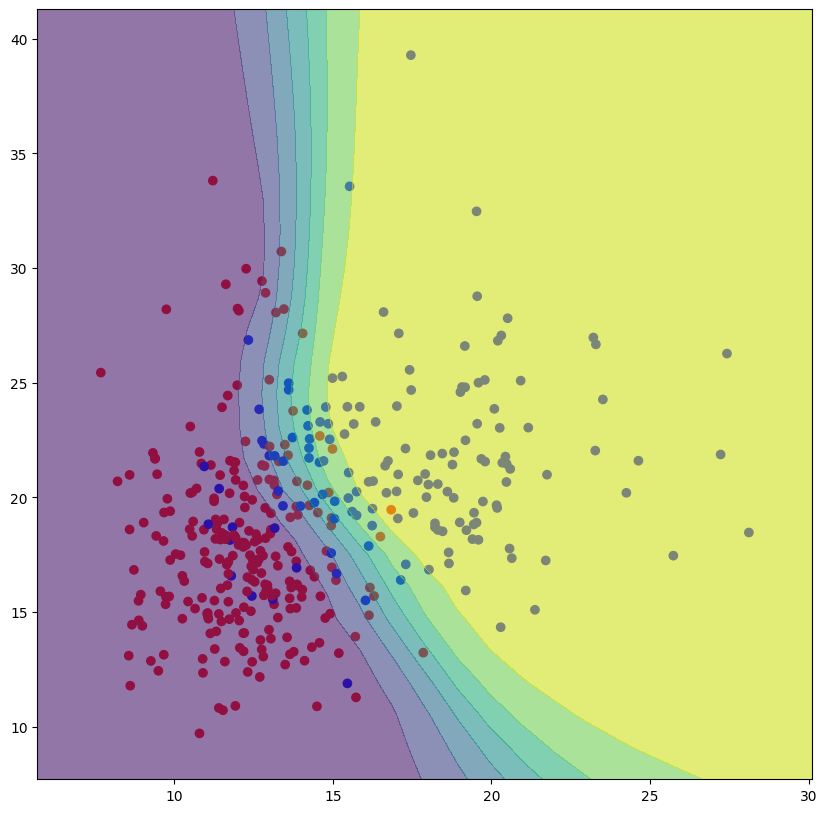

In [9]:
## THIS VISUALIZATION SHOWS THE DECISION PLANE USING ONLY 2! FEATURES
## The actual classifer uses all features and will thus separate in higher dimensions

# PLOTTING
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])

# Plot the training points
vfunc = np.vectorize(lambda x : np.where(classifier.classes_ == x)[0])
y_train_index = vfunc(y_train)
y_train_index = y_train_index == 0

ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train_index, cmap=cm_bright)

classifier.fit(X_train[:, 0:2], y_train_index)

DecisionBoundaryDisplay.from_estimator(
    classifier, X_train[:, 0:2], alpha=0.6, ax=ax, eps=2.0, grid_resolution=25, response_method="predict_proba"
)